In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
from sklearn import metrics, preprocessing


In [4]:
data=pd.read_csv('train.csv')

In [5]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
data.shape

(2000, 21)

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
a=data.nunique()
print(a)

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


In [10]:
data.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [11]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
data.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [13]:
# Show all columns
columns = list(data.columns)
for i, column in enumerate(columns):
    print(i+1, ':', column)

1 : battery_power
2 : blue
3 : clock_speed
4 : dual_sim
5 : fc
6 : four_g
7 : int_memory
8 : m_dep
9 : mobile_wt
10 : n_cores
11 : pc
12 : px_height
13 : px_width
14 : ram
15 : sc_h
16 : sc_w
17 : talk_time
18 : three_g
19 : touch_screen
20 : wifi
21 : price_range


In [14]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [16]:
import matplotlib.pyplot as plt

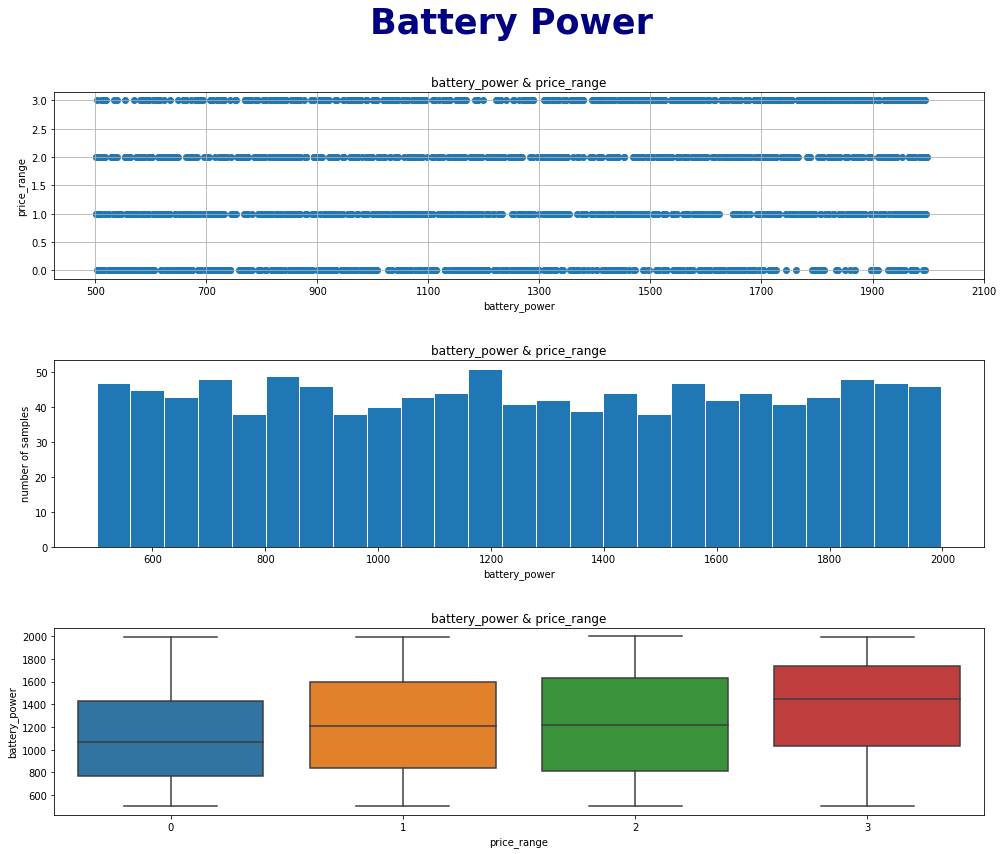

In [17]:


# Col 1: battery_power
title = 'battery_power & price_range'

# Create a 3-panel subplot with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Battery Power', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax1): Scatter plot
ax1.scatter(data.battery_power, data.price_range)
ax1.set(title=title, xlabel='battery_power', ylabel='price_range', xticks=np.arange(500, 2200, 200))
ax1.grid()

# Subplot 2 (ax2): Histogram
x = data.battery_power.value_counts().sort_values().index
y = data.battery_power.value_counts().sort_values()
ax2.hist(x, bins=25, histtype='bar', edgecolor='white')
ax2.set(title=title, xlabel='battery_power', ylabel='number of samples')

# Subplot 3 (ax3): Box plot
sns.boxplot(x='price_range', y='battery_power', data=data, ax=ax3)
ax3.set(title=title)

# Display the entire plot
plt.show()


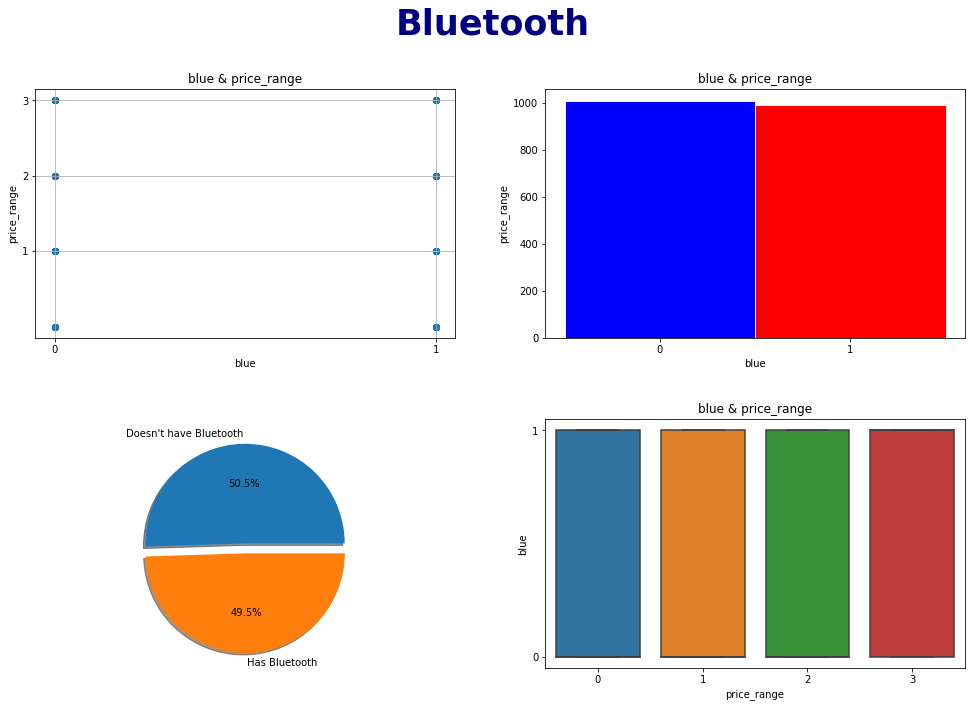

In [18]:
# Col 2: blue
title = 'blue & price_range'

# Create a 2x2 grid subplot with a specified size
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Bluetooth', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax[0, 0]): Scatter plot
ax[0, 0].scatter(data.blue, data.price_range)
ax[0, 0].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()

# Subplot 2 (ax[0, 1]): Bar plot
c = ['red', 'blue']
x = data.blue.value_counts().sort_values().index
y = data.blue.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5))

# Subplot 3 (ax[1, 0]): Pie chart
d = data[['blue']]
d = d.groupby('blue').size()
labels = ['Doesn\'t have Bluetooth', 'Has Bluetooth']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# Subplot 4 (ax[1, 1]): Box plot
sns.boxplot(x='price_range', y='blue', data=data, ax=ax[1, 1]).set(title=title, yticks=np.arange(0, 1.5))

# Display the entire plot
plt.show()


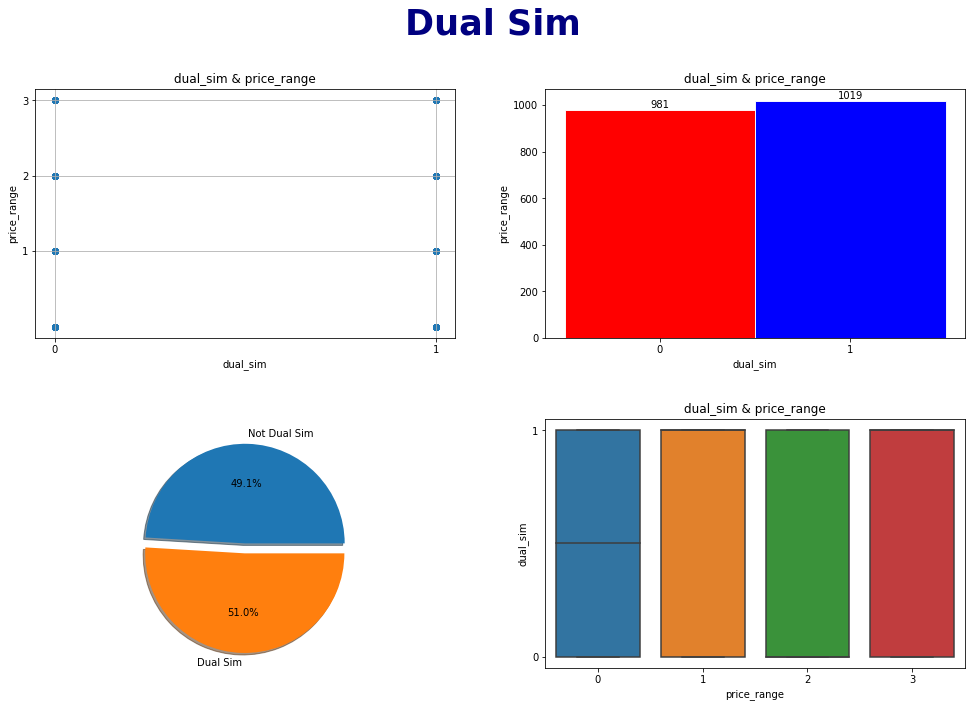

In [19]:
# Col 4: dual_sim
title = 'dual_sim & price_range'

# Create a 2x2 grid subplot with a specified size
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Dual Sim', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax[0, 0]): Scatter plot
ax[0, 0].scatter(data.dual_sim, data.price_range)
ax[0, 0].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()

# Subplot 2 (ax[0, 1]): Bar plot
c = ['red', 'blue']
x = data.dual_sim.value_counts().sort_values().index
y = data.dual_sim.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5))

# Subplot 3 (ax[1, 0]): Pie chart
d = data[['dual_sim']]
d = d.groupby('dual_sim').size()
labels = ['Not Dual Sim', 'Dual Sim']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# Subplot 4 (ax[1, 1]): Box plot
sns.boxplot(x='price_range', y='dual_sim', data=data, ax=ax[1, 1]).set(title=title, yticks=np.arange(0, 1.5))

# Display the entire plot
plt.show()


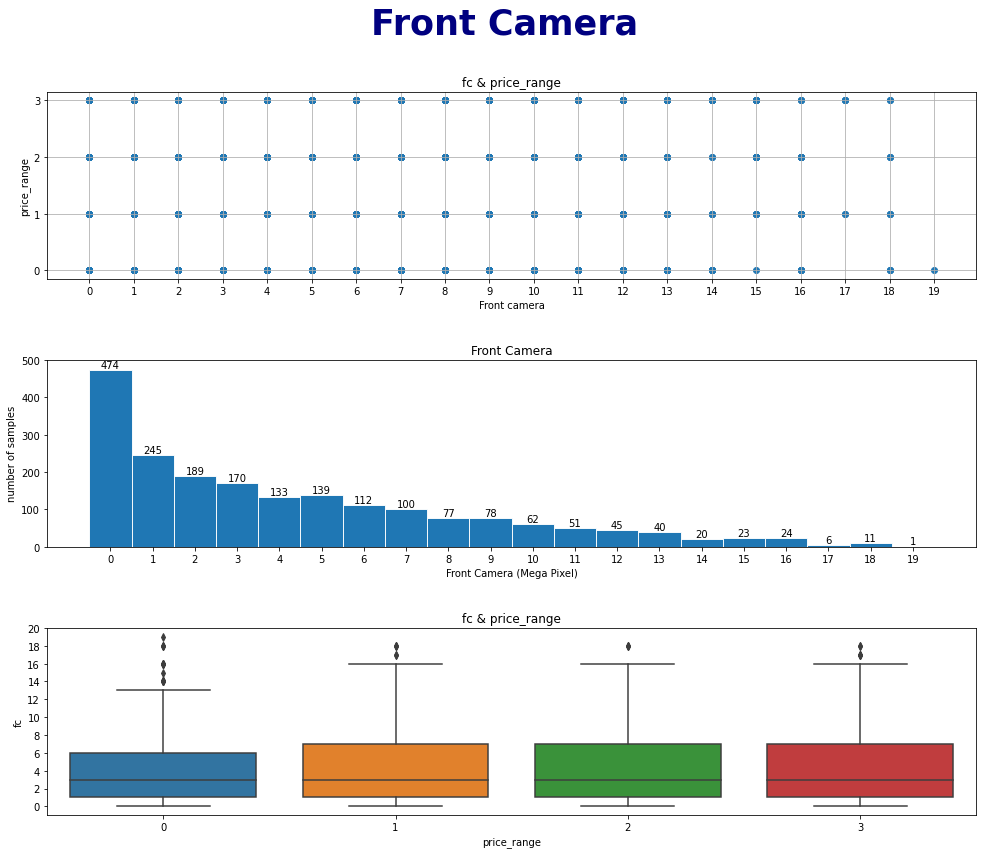

In [20]:
# Col 5: fc (Front camera)
title = 'fc & price_range'

# Create a 3-panel subplot with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Front Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax1): Scatter plot
ax1.scatter(data.fc, data.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(0, 20), yticks=np.arange(0, 4))
ax1.grid()

# Subplot 2 (ax2): Bar plot
x = data.fc.value_counts().sort_values().index
y = data.fc.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='Front Camera', xlabel='Front Camera (Mega Pixel)', ylabel='number of samples', xticks=np.arange(0, 20, 1), yticks=np.arange(0, 510, 100))

# Subplot 3 (ax3): Box plot
sns.boxplot(x='price_range', y='fc', data=data, ax=ax3).set(title=title, yticks=np.arange(0, 21, 2))

# Display the entire plot
plt.show()


Subplot 1 (ax1): Scatter plot - It shows the relationship between "Front Camera" (x-axis) and "price_range" (y-axis) for each data point. The x-axis is labeled "Front camera," and the y-axis is labeled "price_range." Grid lines are added for better readability.

Subplot 2 (ax2): Bar plot - It represents the distribution of "Front Camera" values. The x-axis represents "Front Camera" (Mega Pixels), and the y-axis represents the frequency of each "Front Camera" value in the dataset. The percentage labels are added to the bars, and appropriate xticks and yticks are set for better readability.

Subplot 3 (ax3): Box plot - It presents the distribution of "Front Camera" values for each "price_range" category. The x-axis corresponds to the "price_range," and the y-axis represents the corresponding "Front Camera" values. The yticks are set to range from 0 to 20 in steps of 2.

This 3-panel plot allows for a comprehensive analysis of the relationship between "Front Camera" and "price_range" using different visualization techniques 







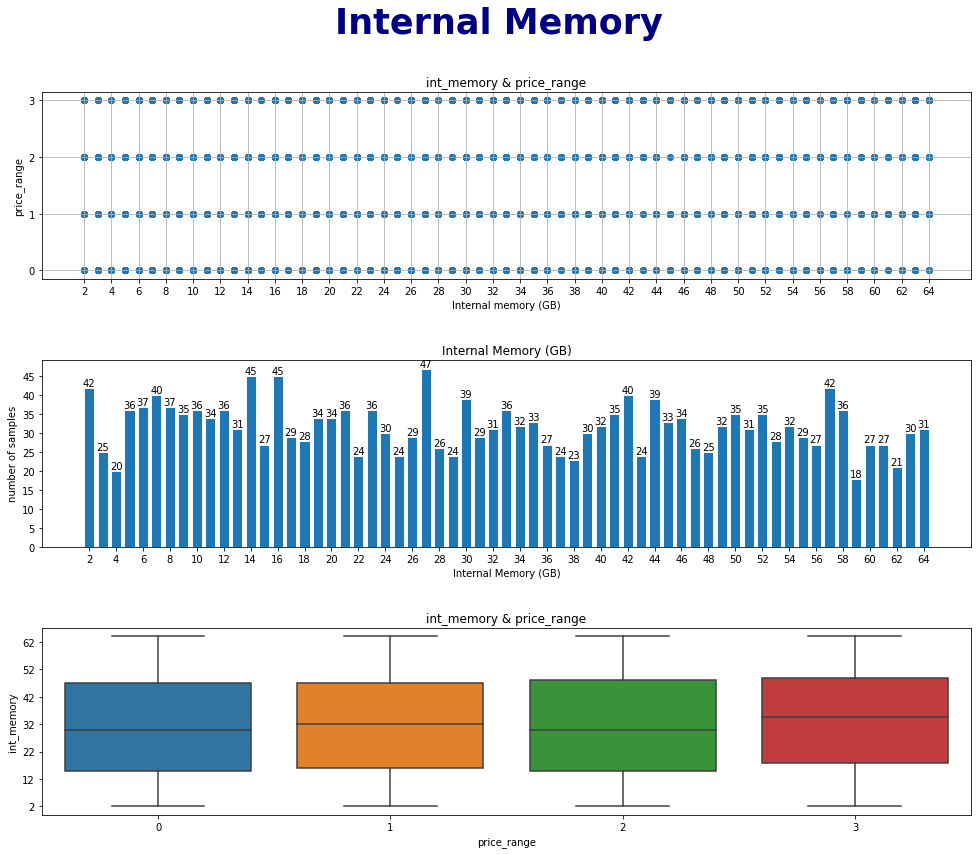

In [21]:
# Col 7: int_memory
title = 'int_memory & price_range'

# Create a 3-panel subplot with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Internal Memory', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax1): Scatter plot
ax1.scatter(data.int_memory, data.price_range)
ax1.set(title=title, xlabel='Internal memory (GB)', ylabel='price_range', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 4))
ax1.grid()

# Subplot 2 (ax2): Bar plot
x = data.int_memory.value_counts().sort_values().index
y = data.int_memory.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.75, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='Internal Memory (GB)', xlabel='Internal Memory (GB)', ylabel='number of samples', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 50, 5))

# Subplot 3 (ax3): Box plot
sns.boxplot(x='price_range', y='int_memory', data=data, ax=ax3).set(title=title, yticks=np.arange(2, 70, 10))

# Display the entire plot
plt.show()


In this code, three different types of plots are used:

Subplot 1 (ax1): Scatter plot - It shows the relationship between "Internal Memory" (x-axis) and "price_range" (y-axis) for each data point. The x-axis is labeled "Internal memory (GB)," and the y-axis is labeled "price_range." Grid lines are added for better readability.

Subplot 2 (ax2): Bar plot - It represents the distribution of "Internal Memory" values in gigabytes (GB). The x-axis represents "Internal Memory" in GB, and the y-axis represents the frequency of each "Internal Memory" value in the dataset. The percentage labels are added to the bars, and appropriate xticks and yticks are set for better readability.

Subplot 3 (ax3): Box plot - It presents the distribution of "Internal Memory" values for each "price_range" category. The x-axis corresponds to the "price_range," and the y-axis represents the corresponding "Internal Memory" values in GB. The yticks are set to range from 2 to 70 in steps of 10

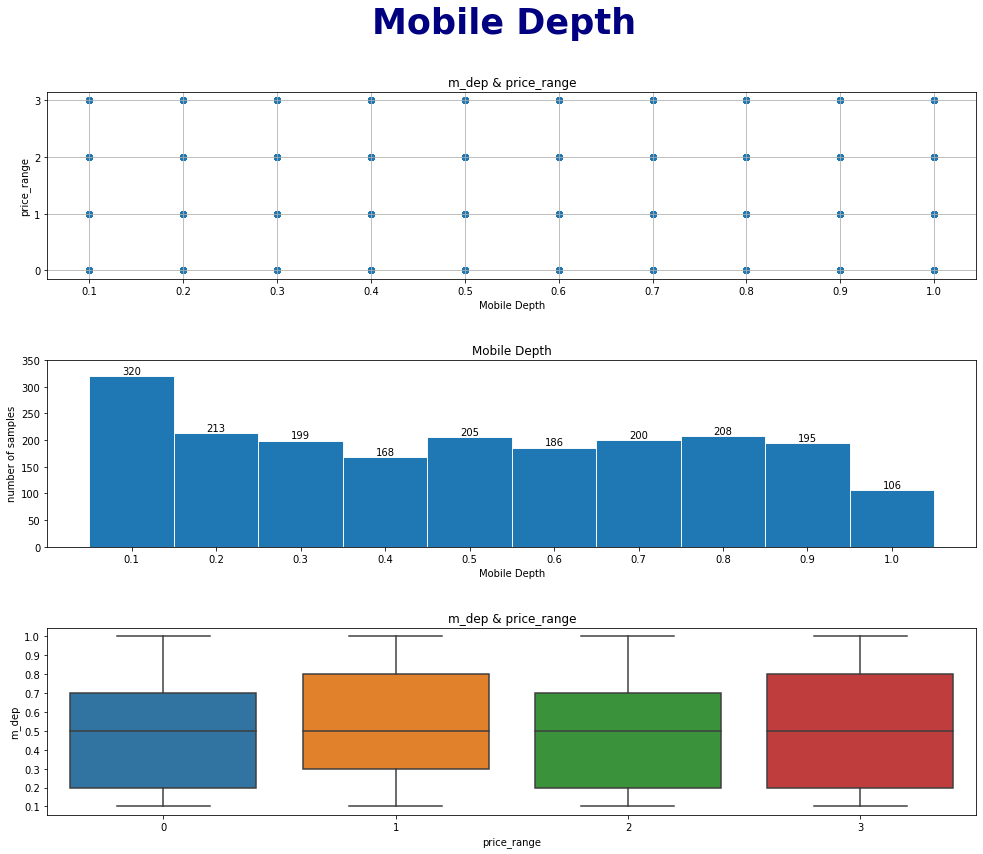

In [22]:
# Col 8: m_dep (Mobile Depth)
title = 'm_dep & price_range'

# Create a 3-panel subplot with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Mobile Depth', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax1): Scatter plot
ax1.scatter(data.m_dep, data.price_range)
ax1.set(title=title, xlabel='Mobile Depth', ylabel='price_range', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 4))
ax1.grid()

# Subplot 2 (ax2): Bar plot
x = data.m_dep.value_counts().sort_values().index
y = data.m_dep.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='Mobile Depth', xlabel='Mobile Depth', ylabel='number of samples', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 360, 50))

# Subplot 3 (ax3): Box plot
sns.boxplot(x='price_range', y='m_dep', data=data, ax=ax3).set(title=title, yticks=np.arange(0.1, 1.1, 0.1))

# Display the entire plot
plt.show()


In this code, three different types of plots are used:

Subplot 1 (ax1): Scatter plot - It shows the relationship between "Mobile Depth" (x-axis) and "price_range" (y-axis) for each data point. The x-axis is labeled "Mobile Depth," and the y-axis is labeled "price_range." Grid lines are added for better readability.

Subplot 2 (ax2): Bar plot - It represents the distribution of "Mobile Depth" values. The x-axis represents "Mobile Depth," and the y-axis represents the frequency of each "Mobile Depth" value in the dataset. The percentage labels are added to the bars, and appropriate xticks and yticks are set for better readability.

Subplot 3 (ax3): Box plot - It presents the distribution of "Mobile Depth" values for each "price_range" category. The x-axis corresponds to the "price_range," and the y-axis represents the corresponding "Mobile Depth" values. The yticks are set to range from 0.1 to 1.0 in steps of 0.1.

This 3-panel plot allows for a comprehensive analysis of the relationship between "Mobile Depth" and "price_range" using different visualization techniques.







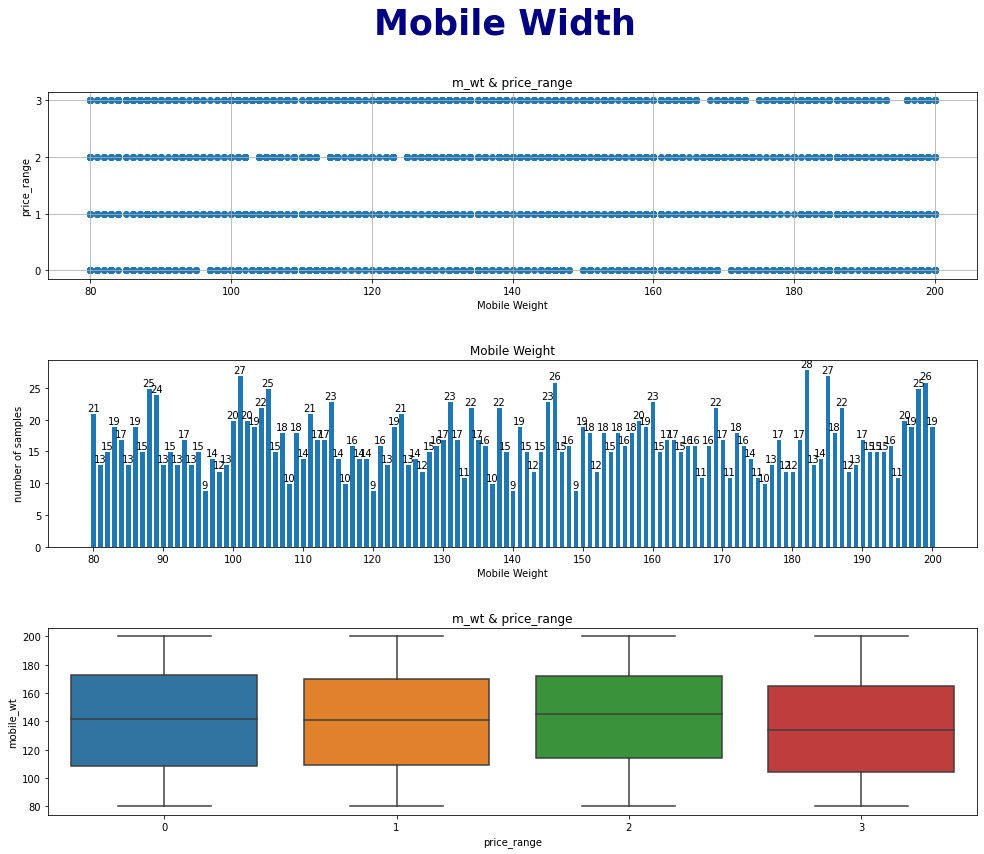

In [24]:
# Col 9: m_wt (Mobile Weight)
title = 'm_wt & price_range'

# Create a 3-panel subplot with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Mobile Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax1): Scatter plot
ax1.scatter(data.mobile_wt, data.price_range)
ax1.set(title=title, xlabel='Mobile Weight', ylabel='price_range', xticks=np.arange(80, 201, 20), yticks=np.arange(0, 4))
ax1.grid()

# Subplot 2 (ax2): Bar plot
x = data.mobile_wt.value_counts().sort_values().index
y = data.mobile_wt.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.8, edgecolor="white", linewidth=1)
ax2.bar_label(bar_container)
ax2.set(title='Mobile Weight', xlabel='Mobile Weight', ylabel='number of samples', xticks=np.arange(80, 210, 10), yticks=np.arange(0, 30, 5))

# Subplot 3 (ax3): Box plot
sns.boxplot(x='price_range', y='mobile_wt', data=data, ax=ax3).set(title=title, yticks=np.arange(80, 201, 20))

# Display the entire plot
plt.show()


In this code, three different types of plots are used:

Subplot 1 (ax1): Scatter plot - It shows the relationship between "Mobile Weight" (x-axis) and "price_range" (y-axis) for each data point. The x-axis is labeled "Mobile Weight," and the y-axis is labeled "price_range." Grid lines are added for better readability.

Subplot 2 (ax2): Bar plot - It represents the distribution of "Mobile Weight" values. The x-axis represents "Mobile Weight," and the y-axis represents the frequency of each "Mobile Weight" value in the dataset. The percentage labels are added to the bars, and appropriate xticks and yticks are set for better readability.

Subplot 3 (ax3): Box plot - It presents the distribution of "Mobile Weight" values for each "price_range" category. The x-axis corresponds to the "price_range," and the y-axis represents the corresponding "Mobile Weight" values. The yticks are set to range from 80 to 200 in steps of 20.

This 3-panel plot allows for a comprehensive analysis of the relationship between "Mobile Weight" and "price_range" using different visualization techniques.







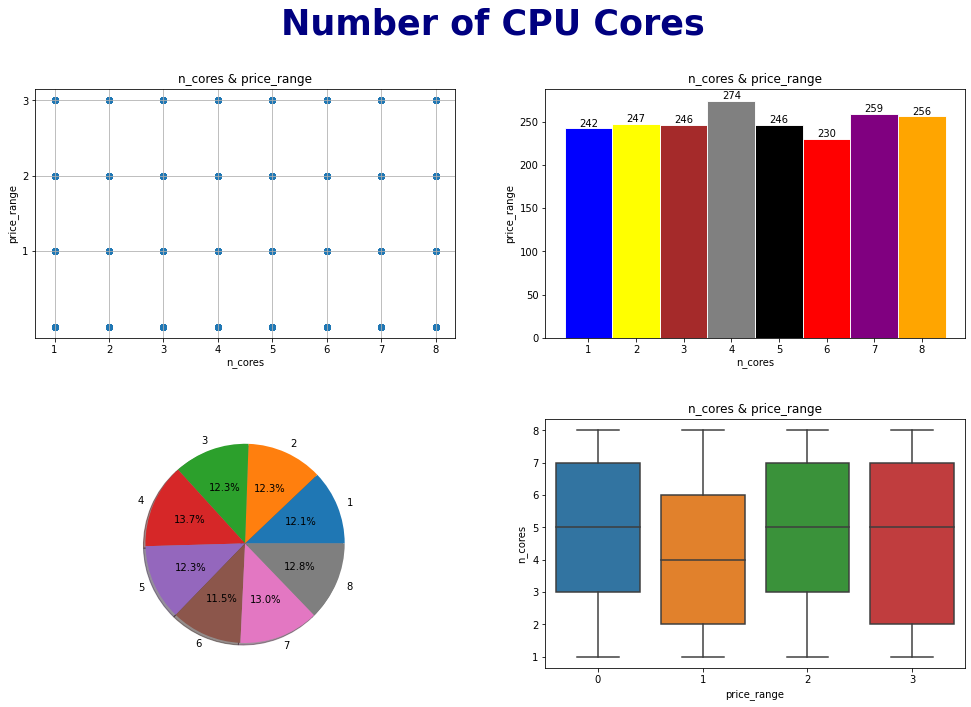

In [26]:
# Col 10: n_cores (Number of CPU Cores)
title = 'n_cores & price_range'

# Create a 2x2 grid subplot with a specified size
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('Number of CPU Cores', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax[0, 0]): Scatter plot
ax[0, 0].scatter(data.n_cores, data.price_range)
ax[0, 0].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()

# Subplot 2 (ax[0, 1]): Bar plot
c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data.n_cores.value_counts().sort_values().index
y = data.n_cores.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='n_cores', ylabel='price_range', xticks=np.arange(1, 9, 1))

# Subplot 3 (ax[1, 0]): Pie chart
d = data[['n_cores']]
d = d.groupby('n_cores').size()
ax[1, 0].pie(d, labels=d.index, autopct='%1.1f%%', shadow=True)

# Subplot 4 (ax[1, 1]): Box plot
sns.boxplot(x='price_range', y='n_cores', data=data, ax=ax[1, 1]).set(title=title, yticks=np.arange(1, 9, 1))

# Display the entire plot
plt.show()


Subplot 3 (ax[1, 0]): Pie chart - It shows the percentage distribution of data points for each number of CPU cores. The chart is labeled, and each slice corresponds to the number of CPU cores. The percentage labels are added to the pie chart, and the slices have a shadow effect for better visibility

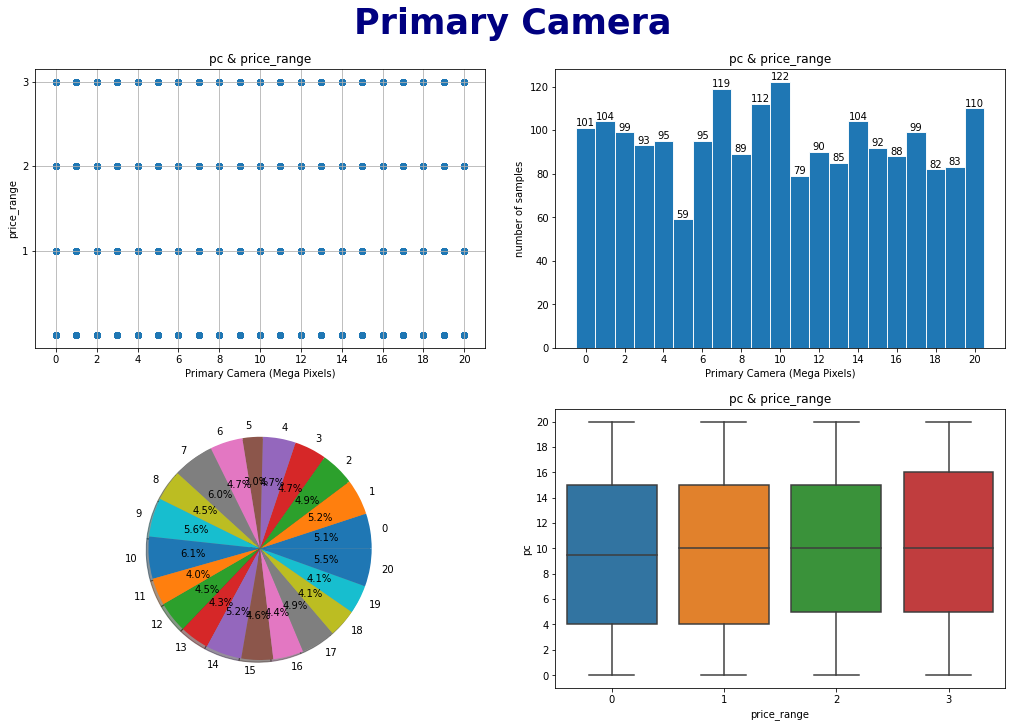

In [27]:
# Col 11: pc (Primary Camera)
title = 'pc & price_range'

# Create a 2x2 grid subplot with a specified size
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Adjust the spacing between subplots
fig.tight_layout(pad=4.0)

# Add a main title to the entire plot
fig.suptitle('Primary Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax[0, 0]): Scatter plot
ax[0, 0].scatter(data.pc, data.price_range)
ax[0, 0].set(title=title, xlabel='Primary Camera (Mega Pixels)', ylabel='price_range', xticks=np.arange(0, 21, 2), yticks=np.arange(1, 4))
ax[0, 0].grid()

# Subplot 2 (ax[0, 1]): Bar plot
x = data.pc.value_counts().sort_values().index
y = data.pc.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='Primary Camera (Mega Pixels)', ylabel='number of samples', xticks=np.arange(0, 21, 2))

# Subplot 3 (ax[1, 0]): Pie chart
d = data[['pc']]
d = d.groupby('pc').size()
ax[1, 0].pie(d, labels=d.index, autopct='%1.1f%%', shadow=True)

# Subplot 4 (ax[1, 1]): Box plot
sns.boxplot(x='price_range', y='pc', data=data, ax=ax[1, 1]).set(title=title, yticks=np.arange(0, 21, 2))

# Display the entire plot
plt.show()


Subplot 1 (ax[0, 0]): Scatter plot - It shows the relationship between "Primary Camera" (x-axis) and "price_range" (y-axis) for each data point. The x-axis is labeled "Primary Camera (Mega Pixels)," and the y-axis is labeled "price_range." Grid lines are added for better readability.

Subplot 2 (ax[0, 1]): Bar plot - It represents the distribution of "Primary Camera" values. The x-axis represents "Primary Camera (Mega Pixels)," and the y-axis represents the frequency of each "Primary Camera" value in the dataset. The percentage labels are added to the bars, and appropriate xticks are set for better readability.

Subplot 3 (ax[1, 0]): Pie chart - It shows the percentage distribution of data points for each "Primary Camera" value. The chart is labeled, and each slice corresponds to a specific "Primary Camera" value. The percentage labels are added to the pie chart, and the slices have a shadow effect for better visibility.

Subplot 4 (ax[1, 1]): Box plot - It presents the distribution of "Primary Camera" values for each "price_range" category. The x-axis corresponds to the "price_range," and the y-axis represents the corresponding "Primary Camera" values.

This 2x2 grid of plots allows for a comprehensive analysis of the relationship between "Primary Camera" and "price_range" using different visualization techniques







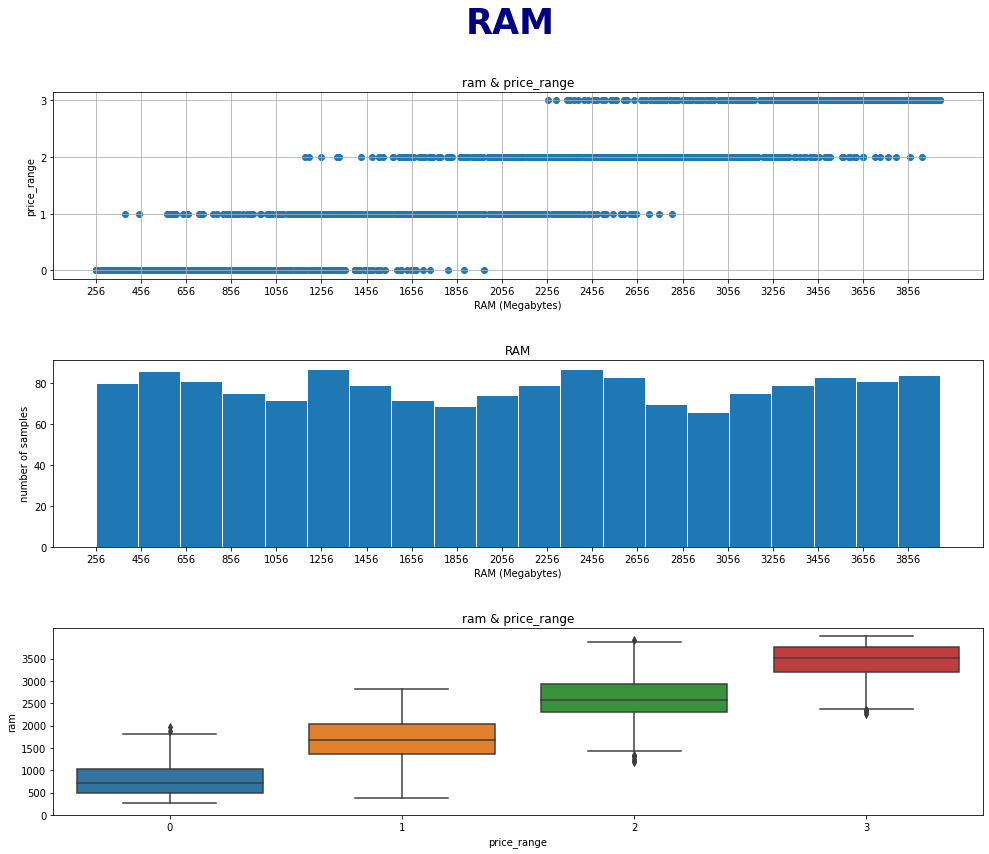

In [28]:
# Col 14: ram (Random Access Memory)
title = 'ram & price_range'

# Create a 3-panel subplot with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12))

# Adjust the spacing between subplots
fig.tight_layout(pad=6.0)

# Add a main title to the entire plot
fig.suptitle('RAM', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax1): Scatter plot
ax1.scatter(data.ram, data.price_range)
ax1.set(title=title, xlabel='RAM (Megabytes)', ylabel='price_range', xticks=np.arange(256, 4000, 200), yticks=np.arange(0, 4))
ax1.grid()

# Subplot 2 (ax2): Histogram
x = data.ram.value_counts().sort_index().index
y = data.ram.value_counts().sort_index()
ax2.hist(x, edgecolor='white', bins=20)
ax2.set(title='RAM', xlabel='RAM (Megabytes)', ylabel='number of samples', xticks=np.arange(256, 4000, 200))

# Subplot 3 (ax3): Box plot
sns.boxplot(x='price_range', y='ram', data=data, ax=ax3).set(title=title, yticks=np.arange(0, 4000, 500))

# Display the entire plot
plt.show()


Subplot 1 (ax1): Scatter plot - It shows the relationship between "RAM" (x-axis) and "price_range" (y-axis) for each data point. The x-axis is labeled "RAM (Megabytes)," and the y-axis is labeled "price_range." Grid lines are added for better readability.

Subplot 2 (ax2): Histogram - It represents the distribution of "RAM" values. The x-axis represents "RAM (Megabytes)," and the y-axis represents the frequency of each "RAM" value in the dataset. The histogram is divided into 20 bins for a better representation of the data, and appropriate xticks are set for better readability.

Subplot 3 (ax3): Box plot - It presents the distribution of "RAM" values for each "price_range" category. The x-axis corresponds to the "price_range," and the y-axis represents the corresponding "RAM" values. The yticks are set to range from 0 to 4000 in steps of 500

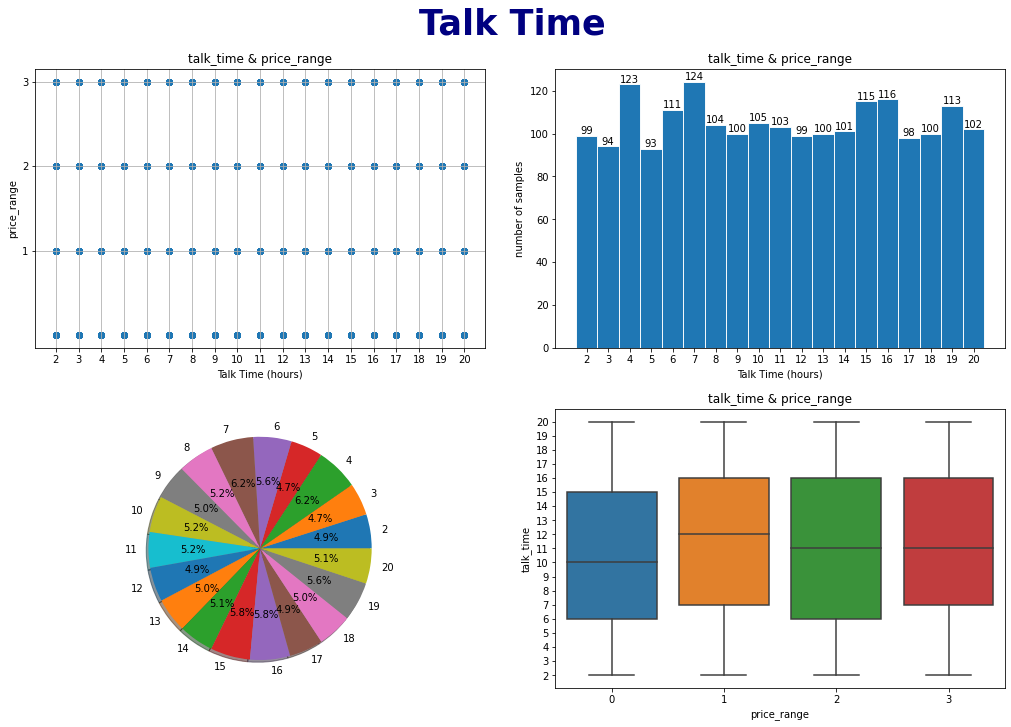

In [29]:
# Col 17: talk_time (Talk Time)
title = 'talk_time & price_range'

# Create a 2x2 grid subplot with a specified size
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Adjust the spacing between subplots
fig.tight_layout(pad=4.0)

# Add a main title to the entire plot
fig.suptitle('Talk Time', fontsize=35, color='navy', y=1.025, fontweight='bold')

# Subplot 1 (ax[0, 0]): Scatter plot
ax[0, 0].scatter(data.talk_time, data.price_range)
ax[0, 0].set(title=title, xlabel='Talk Time (hours)', ylabel='price_range', xticks=np.arange(2, 21, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()

# Subplot 2 (ax[0, 1]): Bar plot
x = data.talk_time.value_counts().sort_values().index
y = data.talk_time.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='Talk Time (hours)', ylabel='number of samples', xticks=np.arange(2, 21, 1))

# Subplot 3 (ax[1, 0]): Pie chart
d = data[['talk_time']]
d = d.groupby('talk_time').size()
ax[1, 0].pie(d, labels=d.index, autopct='%1.1f%%', shadow=True)

# Subplot 4 (ax[1, 1]): Box plot
sns.boxplot(x='price_range', y='talk_time', data=data, ax=ax[1, 1]).set(title=title, yticks=np.arange(2, 21, 1))

# Display the entire plot
plt.show()


# Test Data Set

In [30]:
data1=pd.read_csv('test.csv')

In [31]:
data1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [32]:
data1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [33]:
data1.shape

(1000, 21)

In [34]:
data1.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [36]:
data1.mean()

id                500.5000
battery_power    1248.5100
blue                0.5160
clock_speed         1.5409
dual_sim            0.5170
fc                  4.5930
four_g              0.4870
int_memory         33.6520
m_dep               0.5175
mobile_wt         139.5110
n_cores             4.3280
pc                 10.0540
px_height         627.1210
px_width         1239.7740
ram              2138.9980
sc_h               11.9950
sc_w                5.3160
talk_time          11.0850
three_g             0.7560
touch_screen        0.5000
wifi                0.5070
dtype: float64

In [37]:
data1.drop_duplicates()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [38]:
a=data1.nunique()
print(a)

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64


In [39]:
data1.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [40]:
# Show all columns
columns = list(data1.columns)
for i, column in enumerate(columns):
    print(i+1, ':', column)

1 : id
2 : battery_power
3 : blue
4 : clock_speed
5 : dual_sim
6 : fc
7 : four_g
8 : int_memory
9 : m_dep
10 : mobile_wt
11 : n_cores
12 : pc
13 : px_height
14 : px_width
15 : ram
16 : sc_h
17 : sc_w
18 : talk_time
19 : three_g
20 : touch_screen
21 : wifi


In [41]:
# Create a DataFrame with Train and Test
# Total[ : 2000]---> Train
# Total[2000 : ]---> Test
Target = data.price_range
data.drop(columns='price_range', inplace=True)

Total = pd.concat([data, data1], ignore_index=True)
Total

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,996.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,997.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,998.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,999.0


In [42]:
# Add Target column to Train2
data1.insert(20, 'price_range', Target)
data1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,price_range,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,2,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,2,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,2,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,3,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,2,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,3,0


In [46]:
import matplotlib.pyplot as pt

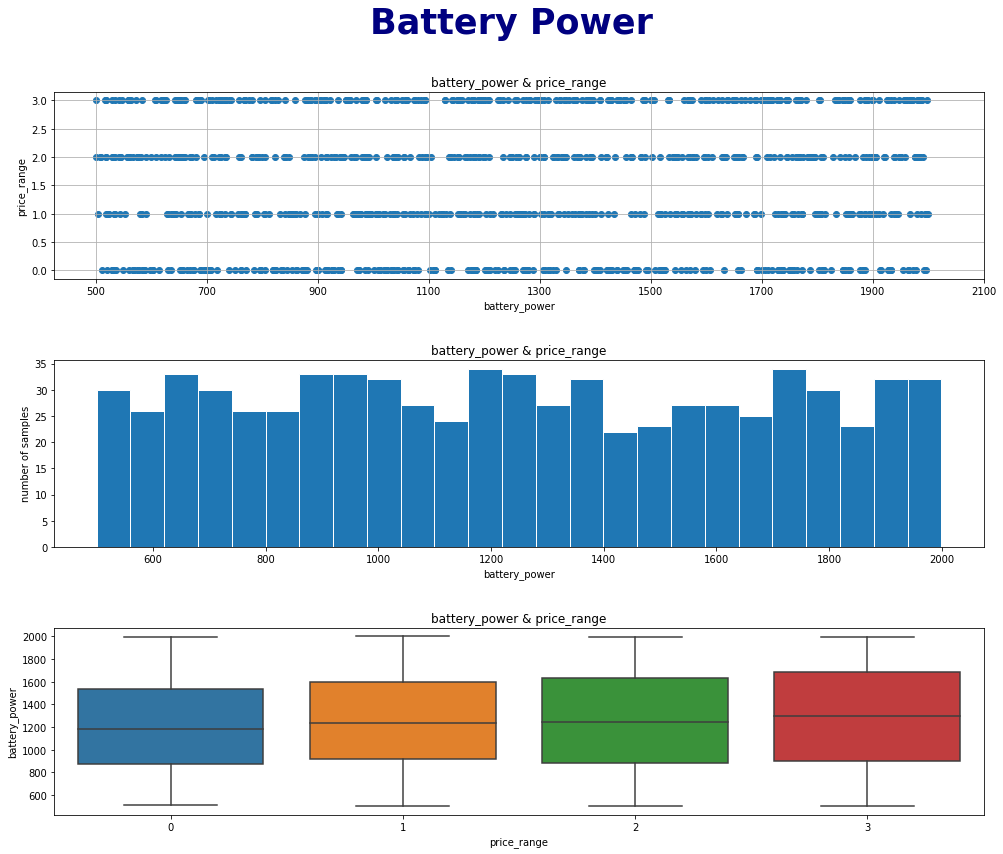

In [47]:
# Col 1 : battery_power

title = 'battery_power & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Battery Power', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(data1.battery_power, data1.price_range)
ax1.set(title=title, xlabel='battery_power', ylabel='price_range', xticks=np.arange(500, 2200, 200))
ax1.grid()


# ax 2
x = data1.battery_power.value_counts().sort_values().index
y = data1.battery_power.value_counts().sort_values()
ax2.hist(x, bins=25, histtype='bar', edgecolor='white')
ax2.set(title=title, xlabel='battery_power', ylabel='number of samples')


# ax3 ---> boxplot
sns.boxplot(x='price_range', y='battery_power', data=data1).set(title=title)

pt.show()

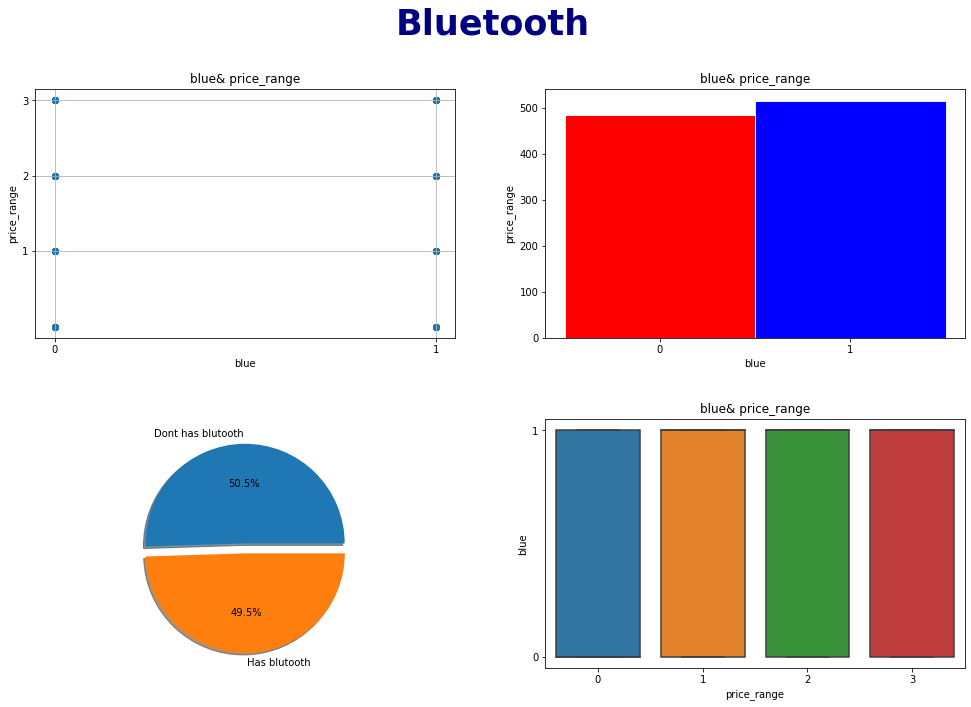

In [48]:
# Col 2 : blue               

title = 'blue& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Bluetooth', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.blue, data1.price_range)
ax[0, 0].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data1.blue.value_counts().sort_values().index
y = data1.blue.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].set(title=title, xlabel='blue', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data[['blue']]
d = d.groupby('blue').size()
labels = ['Dont has blutooth', 'Has blutooth']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
# ax4 ---> boxplot
sns.boxplot(x='price_range', y='blue', data=data1).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

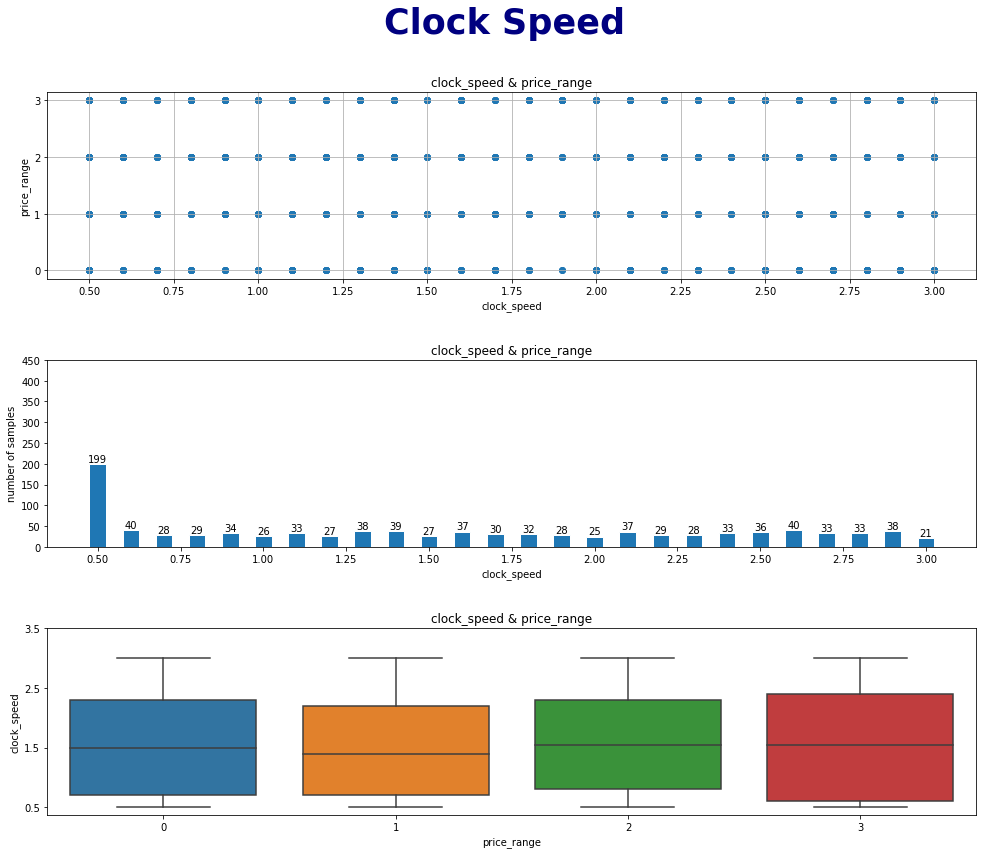

In [49]:
# Col 3 : clock_speed

title = 'clock_speed & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Clock Speed', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax1 ---> scatter
ax1.scatter(data1.clock_speed, data1.price_range)
ax1.set(title=title, xlabel='clock_speed', ylabel='price_range', xticks=np.arange(0.5, 3.25, 0.25), yticks=np.arange(0, 4))
ax1.grid()


# ax 2
x = data1.clock_speed.value_counts().sort_values().index
y = data1.clock_speed.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.05, edgecolor="white")
ax2.bar_label(bar_container)
ax2.set(title=title, xlabel='clock_speed', ylabel='number of samples', xticks=np.arange(0.5, 3.1, 0.25), yticks=np.arange(0, 460, 50))


# ax3 ---> boxplot
sns.boxplot(x='price_range', y='clock_speed', data=data1).set(title=title, yticks=np.arange(0.5, 4))


pt.show()

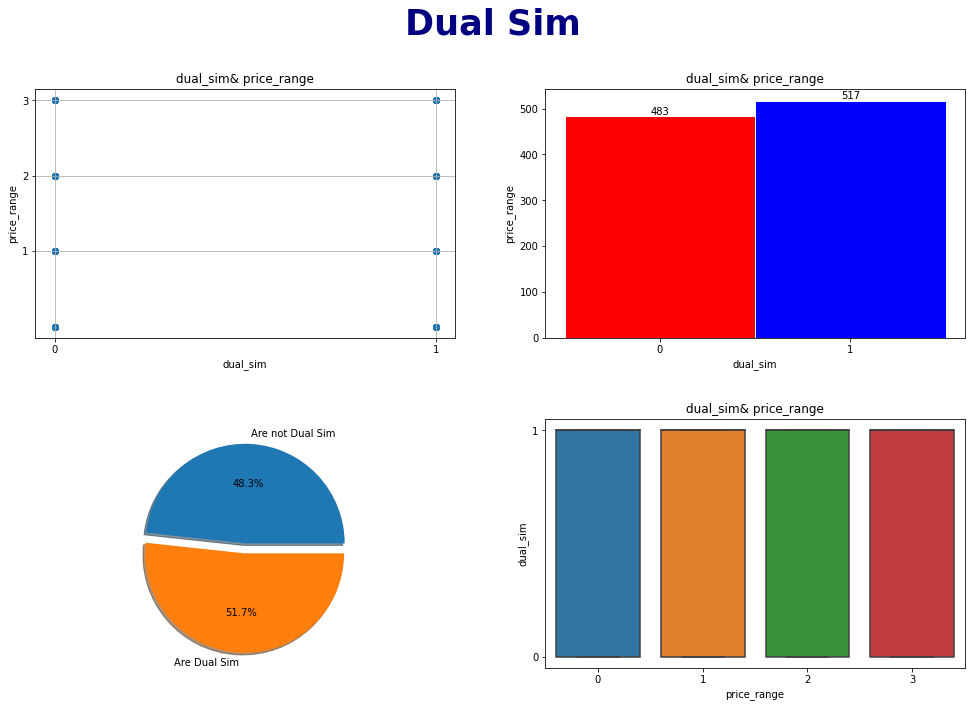

In [50]:
# Col 4 : dual_sim               

title = 'dual_sim& price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Dual Sim', fontsize=35, color='navy', y=1.025, fontweight='bold')


# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.dual_sim, data1.price_range)
ax[0, 0].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
c = ['red', 'blue']
x = data1.dual_sim.value_counts().sort_values().index
y = data1.dual_sim.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='dual_sim', ylabel='price_range', xticks=np.arange(0, 1.5))


# ax 3
d = data1[['dual_sim']]
d = d.groupby('dual_sim').size()
labels = ['Are not Dual Sim', 'Are Dual Sim']
explode = (0, 0.1)
ax[1, 0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='dual_sim', data=data1).set(title=title, yticks=np.arange(0, 1.5))

pt.show()

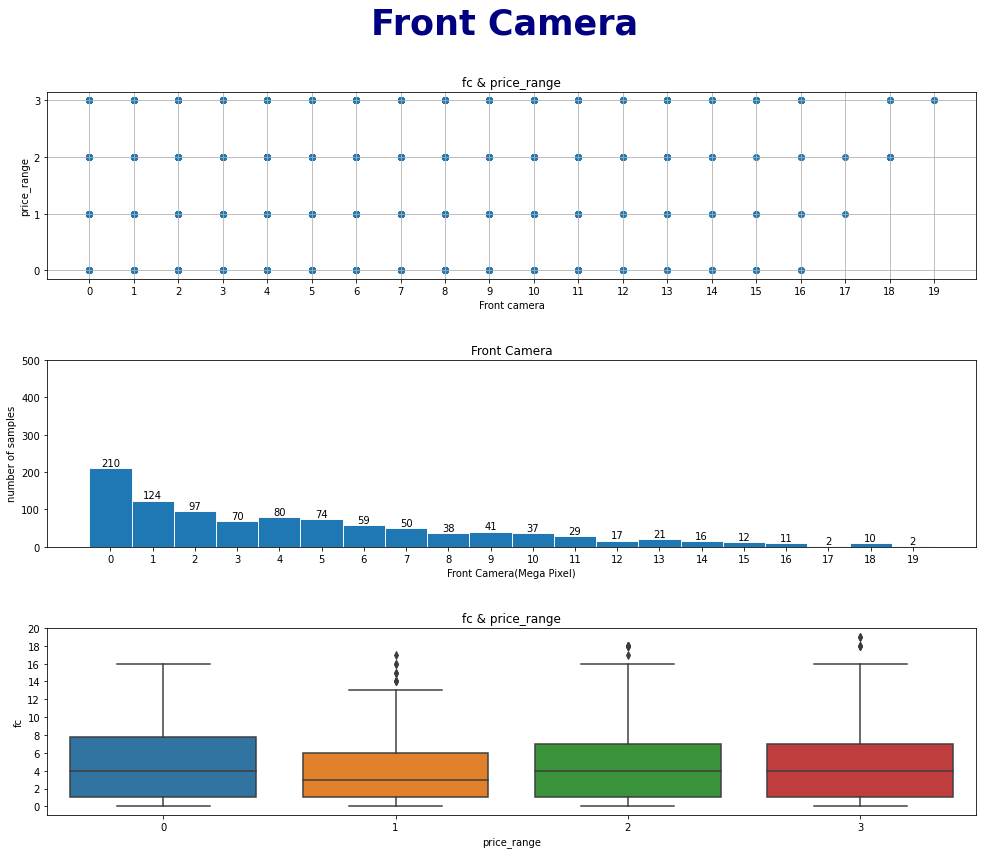

In [51]:
# Col 5 : fc (Front camera)

title = 'fc & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Front Camera', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.fc, data1.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(0, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.fc.value_counts().sort_values().index
y = data1.fc.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='Front Camera', xlabel='Front Camera(Mega Pixel)', ylabel='number of samples', xticks=np.arange(0, 20, 1), yticks=np.arange(0, 510, 100))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='fc', data=data1).set(title=title, yticks=np.arange(0, 21, 2))

pt.show()

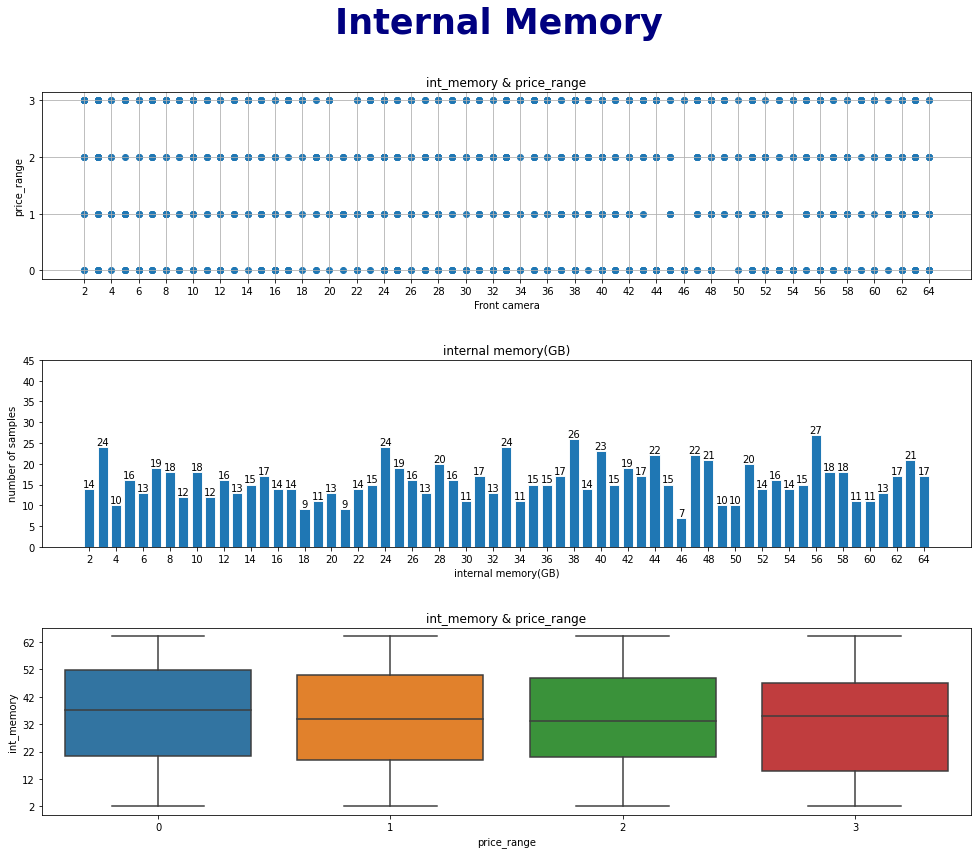

In [52]:
# Col 7 : int_memory

title = 'int_memory & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Internal Memory', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.int_memory, data1.price_range)
ax1.set(title=title, xlabel='Front camera', ylabel='price_range', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.int_memory.value_counts().sort_values().index
y = data1.int_memory.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.75, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='internal memory(GB)', xlabel='internal memory(GB)', ylabel='number of samples', xticks=np.arange(2, 65, 2), yticks=np.arange(0, 50, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='int_memory', data=data1).set(title=title, yticks=np.arange(2, 70, 10))

pt.show()

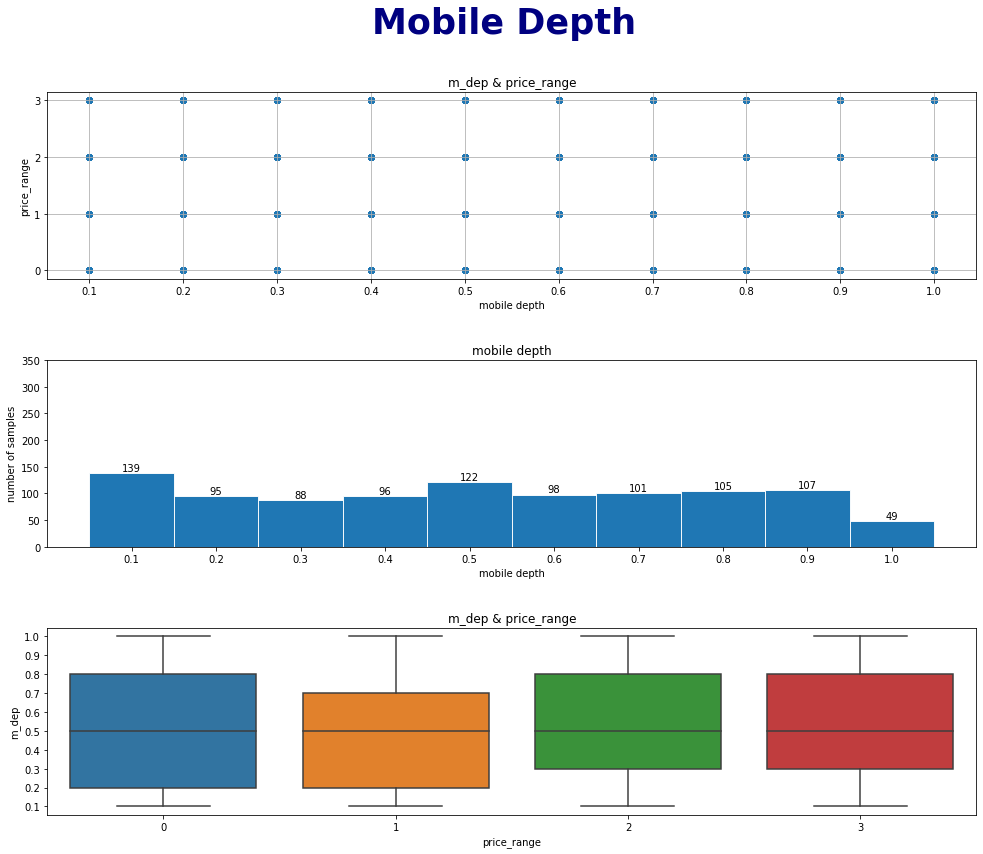

In [53]:
# Col 8 : m_dep

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Depth', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.m_dep, data1.price_range)
ax1.set(title=title, xlabel='mobile depth', ylabel='price_range', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.m_dep.value_counts().sort_values().index
y = data1.m_dep.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.1, edgecolor="white", linewidth=0.9)
ax2.bar_label(bar_container)
ax2.set(title='mobile depth', xlabel='mobile depth', ylabel='number of samples', xticks=np.arange(0.1, 1.1, 0.1), yticks=np.arange(0, 360, 50))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='m_dep', data=data1).set(title=title, yticks=np.arange(0.1, 1.1, 0.1))

pt.show()

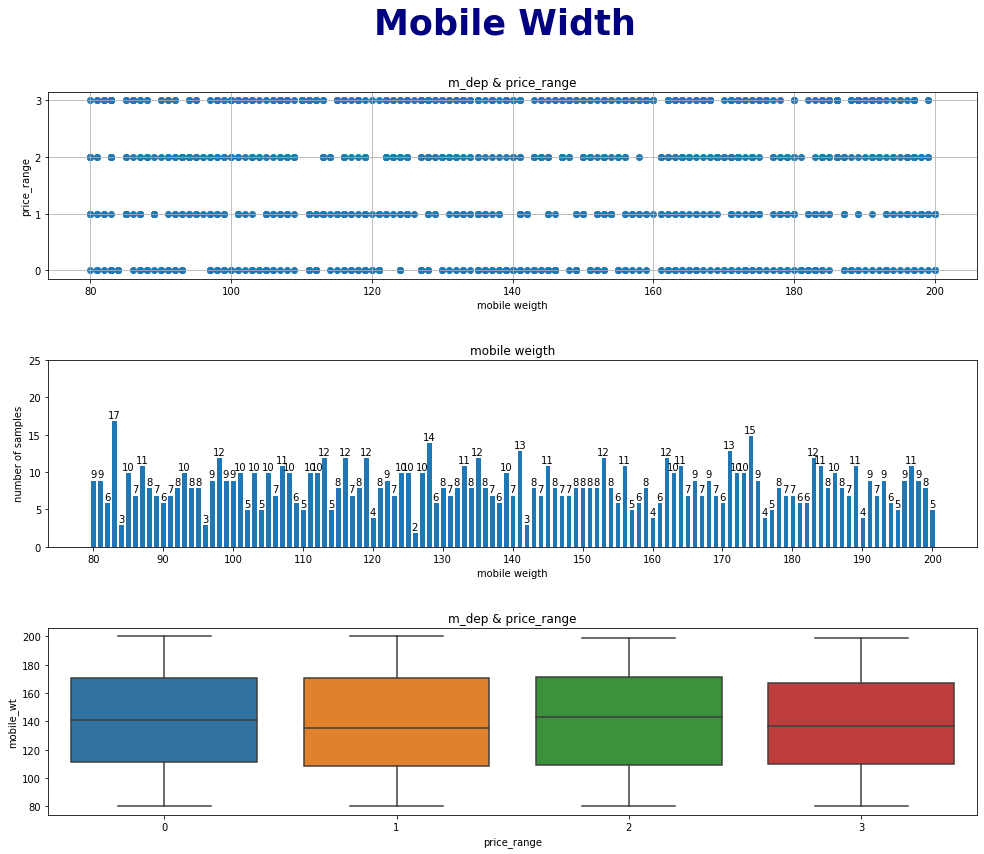

In [54]:
# Col 9 : m_wt

title = 'm_dep & price_range'

fig, (ax1, ax2, ax3) = pt.subplots(3, figsize=(15, 12))
fig.tight_layout(pad=6.0)
fig.suptitle('Mobile Width', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 ---> scatter
ax1.scatter(data1.mobile_wt, data1.price_range)
ax1.set(title=title, xlabel='mobile weigth', ylabel='price_range', xticks=np.arange(80, 201, 20), yticks=np.arange(0, 4))
ax1.grid()

# ax 2
x = data1.mobile_wt.value_counts().sort_values().index
y = data1.mobile_wt.value_counts().sort_values()
bar_container = ax2.bar(x, y, width=0.8, edgecolor="white", linewidth=1)
ax2.bar_label(bar_container)
ax2.set(title='mobile weigth', xlabel='mobile weigth', ylabel='number of samples', xticks=np.arange(80, 210, 10), yticks=np.arange(0, 30, 5))

# ax3 ---> boxplot
sns.boxplot(x='price_range', y='mobile_wt', data=data1).set(title=title, yticks=np.arange(80, 201, 20))

pt.show()

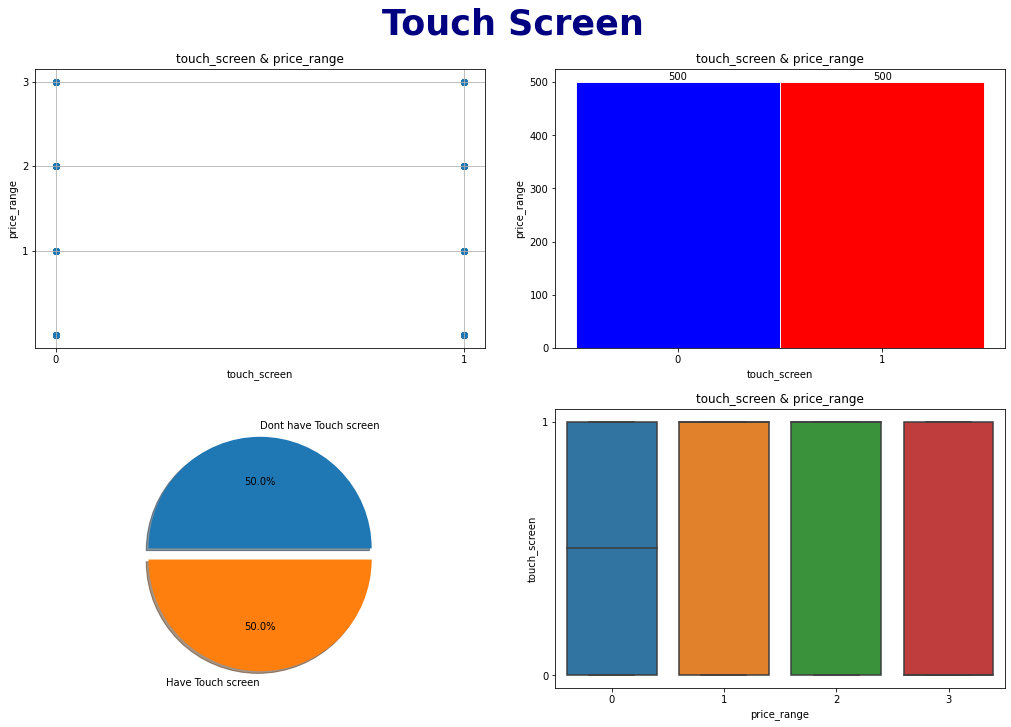

In [57]:
# Col 19 : touch_screen               

title = 'touch_screen & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Touch Screen', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.touch_screen, data1.price_range)
ax[0, 0].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = data1.touch_screen.value_counts().sort_values().index
y = data1.touch_screen.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='touch_screen', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = data1[['touch_screen']]
d = d.groupby('touch_screen').size()
labels = ['Dont have Touch screen', 'Have Touch screen']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='touch_screen', data=data1).set(title=title, yticks=np.arange(0, 2, 1))

pt.show()

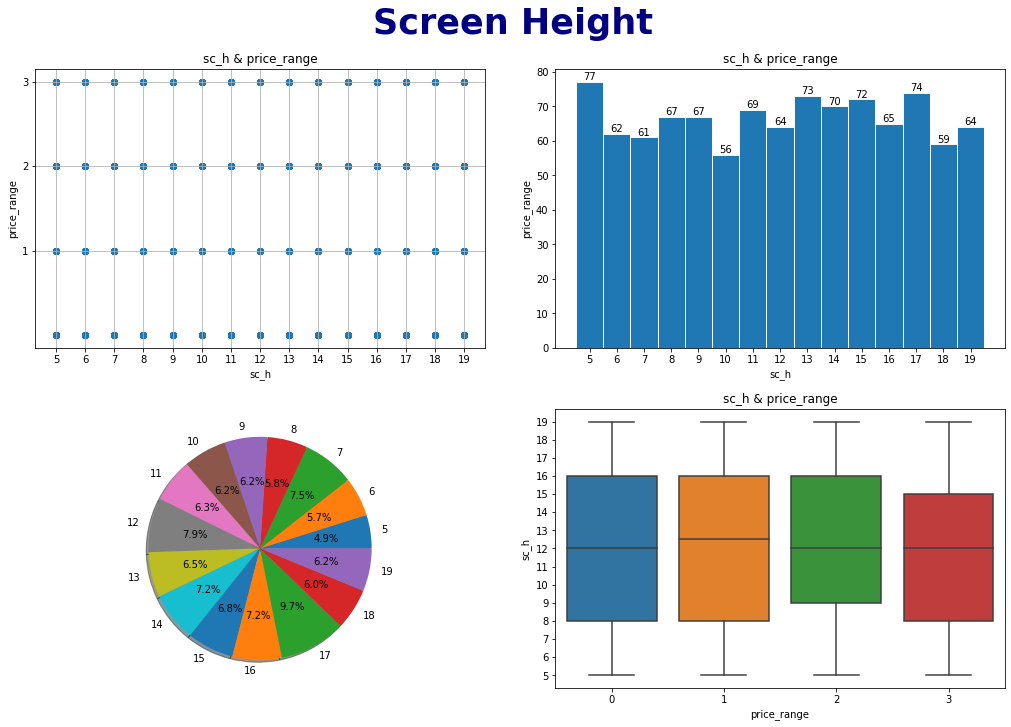

In [58]:
# Col 15 : sc_h               

title = 'sc_h & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Screen Height', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.sc_h, data1.price_range)
ax[0, 0].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
x = data1.sc_h.value_counts().sort_values().index
y = data1.sc_h.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=1, edgecolor="white", linewidth=0.9)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='sc_h', ylabel='price_range', xticks=np.arange(5, 20, 1))


# ax 3
d = data[['sc_h']]
d = d.groupby('sc_h').size()
# labels = ['Dont has 4G', 'Has 4G']
# explode = (0, 0.1)
ax[1, 0].pie(d, labels=np.arange(5, 20, 1), autopct='%1.1f%%', shadow=True)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='sc_h', data=data1).set(title=title, yticks=np.arange(5, 20, 1))

pt.show()

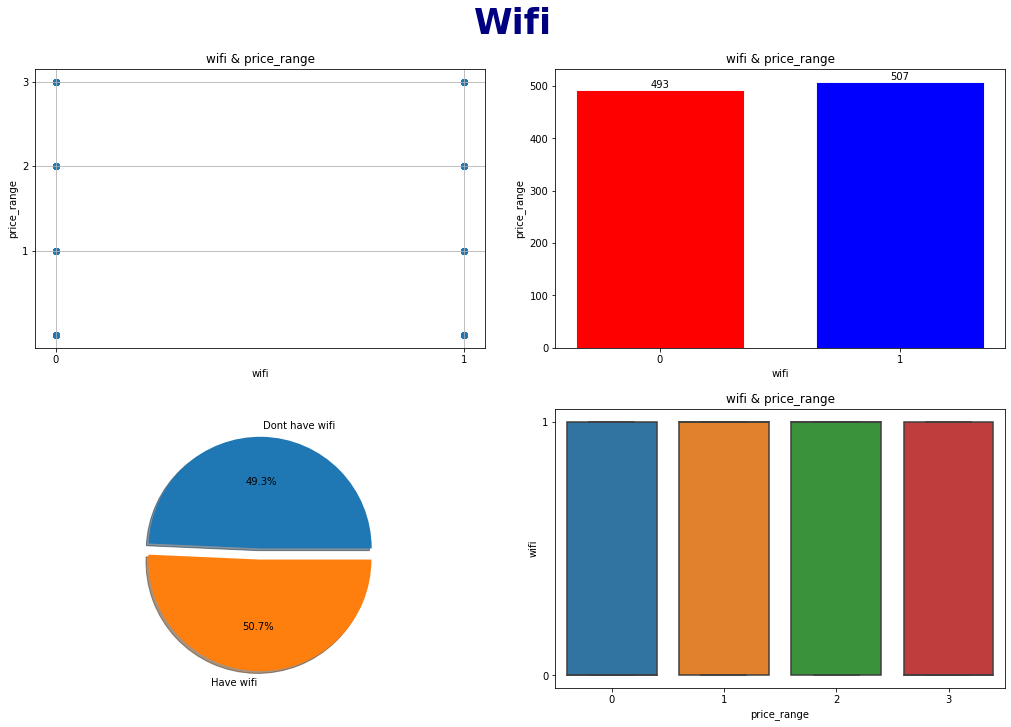

In [59]:
# Col 20 : wifi               

title = 'wifi & price_range'

fig, ax = pt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Wifi', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax[0, 0] ---> scatter
ax[0, 0].scatter(data1.wifi, data1.price_range)
ax[0, 0].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1), yticks=np.arange(1, 4))
ax[0, 0].grid()


# ax 2
# c = ['red', 'blue', 'brown', 'black', 'yellow', 'orange', 'purple', 'gray']
c = ['red', 'blue']
x = data1.wifi.value_counts().sort_values().index
y = data1.wifi.value_counts().sort_values()
bar_container = ax[0, 1].bar(x, y, width=0.7, edgecolor="white", linewidth=0.9, color=c)
ax[0, 1].bar_label(bar_container)
ax[0, 1].set(title=title, xlabel='wifi', ylabel='price_range', xticks=np.arange(0, 2, 1))


# ax 3
d = data1[['wifi']]
d = d.groupby('wifi').size()
labels = ['Dont have wifi', 'Have wifi']
explode = (0, 0.1)
ax[1, 0].pie(d, autopct='%1.1f%%', shadow=True, labels=labels, explode=explode)

# ax4 ---> boxplot
sns.boxplot(x='price_range', y='wifi', data=data1).set(title=title, yticks=np.arange(0, 2, 1))

pt.show()

Thank You 